In [32]:
"""
A1
Writing functions for the following
"""
import math
#function for summation unit
def summation_unit(inputs,weights,bias):
    sum = 0
    for i,w in zip(inputs,weights):
        sum += (i*w)
    return sum + bias
# defining the activation units:
#step function:
def step_function(value:int):
    return 0 if value < 0 else 1
# bipolar step function
def bipolar_step_function(value):
    return -1 if value < 0 else 1

#sigmoid function:
def sigmoid_function(value):
    return 1/(1 + math.exp(-value))

#tanH function
def tanH_function(value):
    return math.tanh(value)

#ReLu function
def ReLu_function(value):
    return value if value > 0 else 0

#leaky ReLu function
def leakyReLu_function(value):
    return value if value > 0 else (0.01 * value)

def error_calculation(actual, predicted):
    return actual - predicted

def sigmoid_derivative(output):
    return output * (1 - output)
                       
# Derivative of ReLU function
def relu_derivative(z):
    return np.where(z > 0, 1, 0)
    

Converged after 130 epochs

Final Predictions after Training:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


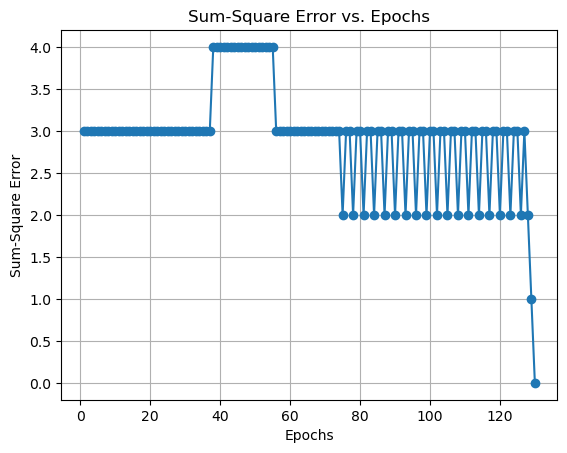

In [27]:
"""
A2: Training perceptron with step function
"""
import numpy as np
import matplotlib.pyplot as plt

# AND gate inputs and outputs
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0, 1])  # AND gate outputs

# Initialize weights and bias
W = np.array([0.2, -0.75])  # Weights W1 and W2
b = 10                      # Bias W0

learning_rate = 0.05         # Learning rate α
max_epochs = 1000            # Maximum number of epochs
convergence_threshold = 0.002 # Convergence error threshold



# Perceptron Training Function
def train_perceptron(X, y, W, b, learning_rate, max_epochs, convergence_threshold):
    error_values = []  # To store SSE for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            # Summation and Prediction using step function
            z = summation_unit(X[i], W, b)
            prediction = step_function(z)
            
            # Error calculation
            error = error_calculation(y[i], prediction)
            
            # Update weights and bias using the error
            W += learning_rate * error * X[i]
            b += learning_rate * error
            
            # Accumulate sum of squared errors (SSE)
            total_error += error ** 2
        
        error_values.append(total_error)  # Store SSE for the epoch
        
        # Check for convergence (if SSE is less than the threshold)
        if total_error <= convergence_threshold:
            print(f"Converged after {epoch + 1} epochs")
            break
    
    return W, b, error_values


# Train the perceptron
final_W, final_b, error_values = train_perceptron(X, y, W, b, learning_rate, max_epochs, convergence_threshold)

# Test the perceptron after training
print("\nFinal Predictions after Training:")
for i in range(len(X)):
    z = summation_unit(X[i], final_W, final_b)
    prediction = step_function(z)
    print(f"Input: {X[i]}, Output: {prediction}")

# Plotting SSE vs Epochs
plt.plot(range(1, len(error_values) + 1), error_values, marker='o')
plt.title('Sum-Square Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.grid()
plt.show()


Converged after 68 epochs

Final Predictions after Training:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


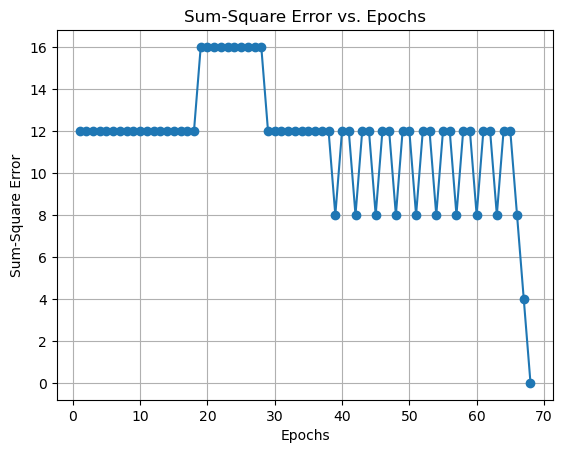

In [28]:
"""
A3 Part 1: Training perceptron with Bipolar step function
"""
import numpy as np
import matplotlib.pyplot as plt

# AND gate inputs and outputs
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([-1, -1, -1, 1])  # AND gate outputs

# Initialize weights and bias
W = np.array([0.2, -0.75])  # Weights W1 and W2
b = 10                      # Bias W0

learning_rate = 0.05         # Learning rate α
max_epochs = 1000            # Maximum number of epochs
convergence_threshold = 0.002 # Convergence error threshold



# Perceptron Training Function
def train_perceptron(X, y, W, b, learning_rate, max_epochs, convergence_threshold):
    error_values = []  # To store SSE for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            # Summation and Prediction using bipolar step function
            z = summation_unit(X[i], W, b)
            prediction = bipolar_step_function(z)
            
            # Error calculation
            error = error_calculation(y[i], prediction)
            
            # Update weights and bias using the error
            W += learning_rate * error * X[i]
            b += learning_rate * error
            
            # Accumulate sum of squared errors (SSE)
            total_error += error ** 2
        
        error_values.append(total_error)  # Store SSE for the epoch
        
        # Check for convergence (if SSE is less than the threshold)
        if total_error <= convergence_threshold:
            print(f"Converged after {epoch + 1} epochs")
            break
    
    return W, b, error_values


# Train the perceptron
final_W, final_b, error_values = train_perceptron(X, y, W, b, learning_rate, max_epochs, convergence_threshold)

# Test the perceptron after training
print("\nFinal Predictions after Training:")
for i in range(len(X)):
    z = summation_unit(X[i], final_W, final_b)
    prediction = step_function(z)
    print(f"Input: {X[i]}, Output: {prediction}")

# Plotting SSE vs Epochs
plt.plot(range(1, len(error_values) + 1), error_values, marker='o')
plt.title('Sum-Square Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.grid()
plt.show()


Final Predictions after Training:
Input: [0 0], Output (Binary): 0
Input: [0 1], Output (Binary): 0
Input: [1 0], Output (Binary): 0
Input: [1 1], Output (Binary): 1


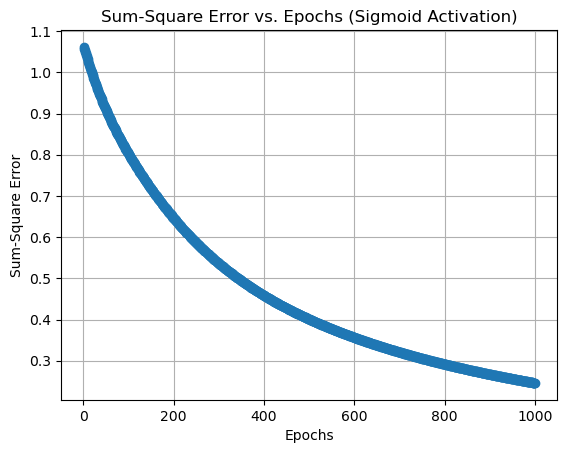

In [29]:
"""
A3 Part 2: Training perceptron with sigmoid function
"""
import numpy as np
import matplotlib.pyplot as plt

# AND gate inputs and outputs
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0, 1])  # AND gate outputs

# Initialize weights and bias
W = np.array([0.2, -0.75])  # Weights W1 and W2
b = 0                        # Bias W0

learning_rate = 0.05          # Learning rate α
max_epochs = 1000             # Maximum number of epochs
convergence_threshold = 0.002  # Convergence error threshold (adjustable)


# Apply threshold to convert sigmoid output to binary (0 or 1)
def threshold_prediction(prediction, threshold=0.5):
    return 1 if prediction >= threshold else 0

# Perceptron Training Function using Sigmoid Activation
def train_perceptron(X, y, W, b, learning_rate, max_epochs, convergence_threshold):
    error_values = []  # To store SSE for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            # Summation and Prediction using Sigmoid function
            z = summation_unit(X[i], W, b)
            prediction = sigmoid_function(z)
            
            # Error calculation
            error = error_calculation(y[i], prediction)
            
            # Update weights and bias using gradient descent
            W += learning_rate * error * sigmoid_derivative(prediction) * X[i]
            b += learning_rate * error * sigmoid_derivative(prediction)
            
            # Accumulate sum of squared errors (SSE)
            total_error += error ** 2
        
        error_values.append(total_error)  # Store SSE for the epoch
        
        # Check for convergence (if SSE is less than the threshold)
        if total_error <= convergence_threshold:
            print(f"Converged after {epoch + 1} epochs")
            break
    
    return W, b, error_values

# Train the perceptron using Sigmoid Activation
final_W, final_b, error_values = train_perceptron(X, y, W, b, learning_rate, max_epochs, convergence_threshold)

# Test the perceptron after training with thresholding
print("\nFinal Predictions after Training:")
for i in range(len(X)):
    z = summation_unit(X[i], final_W, final_b)
    prediction = sigmoid_function(z)
    binary_prediction = threshold_prediction(prediction)  # Convert to binary
    print(f"Input: {X[i]}, Output (Binary): {binary_prediction}")

# Plotting SSE vs Epochs
plt.plot(range(1, len(error_values) + 1), error_values, marker='o')
plt.title('Sum-Square Error vs. Epochs (Sigmoid Activation)')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.grid()
plt.show()



Converged after 147 epochs

Final Predictions after Training:
Input: [0 0], Output (ReLU): 0.0000
Input: [0 1], Output (ReLU): 0.0217
Input: [1 0], Output (ReLU): 0.0244
Input: [1 1], Output (ReLU): 0.9780


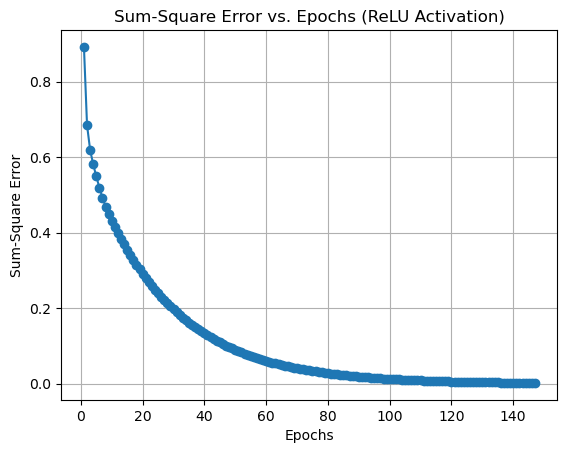

In [41]:
"""
A3 Part 3: Training perceptron with ReLu function
"""
import numpy as np
import matplotlib.pyplot as plt

# AND gate inputs and outputs
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0, 1])  # AND gate outputs

# Initialize weights and bias with small random values
np.random.seed(42)  # For reproducibility
W = np.random.randn(2) * 0.1  # Small random weights for W1 and W2
b = np.random.randn() * 0.1   # Small random bias

learning_rate = 0.1            # Increased learning rate for faster updates
max_epochs = 1000              # Maximum number of epochs
convergence_threshold = 0.002   # Convergence error threshold (adjustable)


# Perceptron Training Function using ReLU Activation
def train_perceptron(X, y, W, b, learning_rate, max_epochs, convergence_threshold):
    error_values = []  # To store SSE for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            # Summation and Prediction using ReLU function
            z = summation_unit(X[i], W, b)
            prediction = ReLu_function(z)
            
            # Error calculation
            error = error_calculation(y[i], prediction)
            
            # Update weights and bias using gradient descent
            W += learning_rate * error * relu_derivative(z) * X[i]
            b += learning_rate * error * relu_derivative(z)
            
            # Accumulate sum of squared errors (SSE)
            total_error += error ** 2
        
        error_values.append(total_error)  # Store SSE for the epoch
        
        # Check for convergence (if SSE is less than the threshold)
        if total_error <= convergence_threshold:
            print(f"Converged after {epoch + 1} epochs")
            break
    
    return W, b, error_values

# Train the perceptron using ReLU Activation
final_W, final_b, error_values = train_perceptron(X, y, W, b, learning_rate, max_epochs, convergence_threshold)

# Test the perceptron after training
print("\nFinal Predictions after Training:")
for i in range(len(X)):
    z = summation_unit(X[i], final_W, final_b)
    prediction = ReLu_function(z)
    print(f"Input: {X[i]}, Output (ReLU): {prediction:.4f}")

# Plotting SSE vs Epochs
plt.plot(range(1, len(error_values) + 1), error_values, marker='o')
plt.title('Sum-Square Error vs. Epochs (ReLU Activation)')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.grid()
plt.show()


Training with learning rate: 0.1
Converged after 11 epochs with learning rate 0.1

Training with learning rate: 0.2
Converged after 10 epochs with learning rate 0.2

Training with learning rate: 0.3
Converged after 9 epochs with learning rate 0.3

Training with learning rate: 0.4
Converged after 8 epochs with learning rate 0.4

Training with learning rate: 0.5
Converged after 5 epochs with learning rate 0.5

Training with learning rate: 0.6
Converged after 5 epochs with learning rate 0.6

Training with learning rate: 0.7
Converged after 7 epochs with learning rate 0.7

Training with learning rate: 0.8
Converged after 7 epochs with learning rate 0.8

Training with learning rate: 0.9
Converged after 7 epochs with learning rate 0.9

Training with learning rate: 1
Converged after 7 epochs with learning rate 1


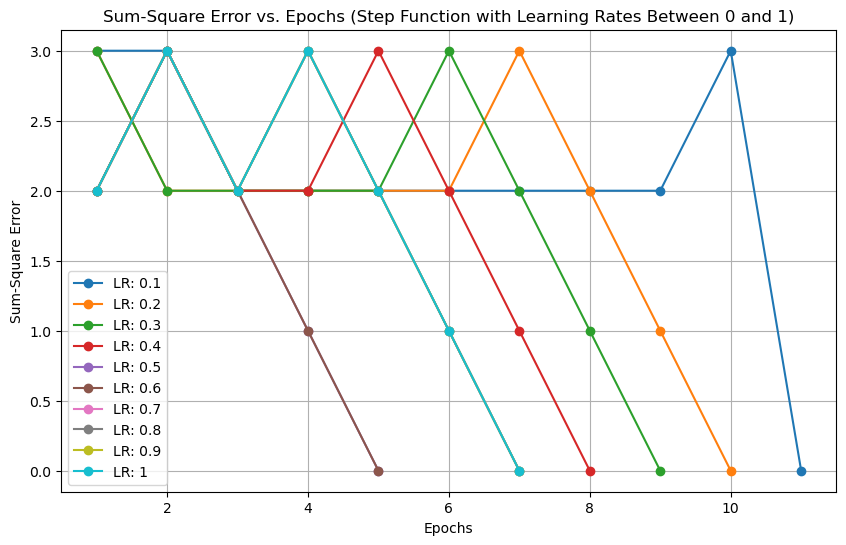

In [42]:
"""
A4: Training perceptron using step function but with different learning rates
"""
import numpy as np
import matplotlib.pyplot as plt

# AND gate inputs and outputs
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0, 1])  # AND gate outputs

# Initialize weights and bias
W_init = np.array([0.2, -0.75])  # Initial Weights W1 and W2
b_init = 0.1                      # Initial Bias W0

# List of learning rates to experiment with (all between 0 and 1)
learning_rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

max_epochs = 1000             # Maximum number of epochs
convergence_threshold = 0.002  # Convergence error threshold

# Perceptron Training Function using Step Function
def train_perceptron(X, y, W, b, learning_rate, max_epochs, convergence_threshold):
    error_values = []  # To store SSE for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            # Summation and Prediction using Step Function
            z = summation_unit(X[i], W, b)
            prediction = step_function(z)
            
            # Error calculation
            error = y[i] - prediction
            
            # Update weights and bias using perceptron learning rule
            W += learning_rate * error * X[i]
            b += learning_rate * error
            
            # Accumulate sum of squared errors (SSE)
            total_error += error ** 2
        
        error_values.append(total_error)  # Store SSE for the epoch
        
        # Check for convergence (if SSE is less than the threshold)
        if total_error <= convergence_threshold:
            print(f"Converged after {epoch + 1} epochs with learning rate {learning_rate}")
            break
    
    return W, b, error_values

# To store results for different learning rates
results = {}

# Train and test the perceptron with different learning rates
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    # Reset weights and bias for each learning rate
    W = W_init.copy()
    b = b_init
    
    # Train the perceptron
    final_W, final_b, error_values = train_perceptron(X, y, W, b, lr, max_epochs, convergence_threshold)
    
    # Store the results for plotting
    results[lr] = error_values

# Plotting SSE vs Epochs for each learning rate
plt.figure(figsize=(10, 6))
for lr, errors in results.items():
    plt.plot(range(1, len(errors) + 1), errors, marker='o', label=f'LR: {lr}')

plt.title('Sum-Square Error vs. Epochs (Step Function with Learning Rates Between 0 and 1)')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.legend()
plt.grid()
plt.show()